
# Project: No Show Appoitments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
#### About the Dataset

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment.

With the features being presented, like gender, age, neighbourhood, etc.
What factors are
important for us to
know in order to
predict if a patient will
show up for their
scheduled
appointment?

We will be asking these question:
1. longer waiting days and having no sms recieved is a big factor fot not showing up?
2. Check Days and Months that has high appointments.
3. Living Near The Hospital is a Factor?
4. Statistics About Patients?



#### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section we will load the data, and then check for its cleanliness. and show some quick summary about the data.

### General Properties

In [3]:
# Load your data and print out a few lines.
df = pd.read_csv('noshowappointments.csv')
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [4]:
#having a look at the shape and renaming the columns for consistincy

print('The Data has {} samples and {} features\n'.format(df.shape[0],
                                                       df.shape[1]))

df.rename(columns= lambda x:x.lower().replace(' ','_'),inplace=True)

The Data has 110527 samples and 14 features



In [5]:
#checking the datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null float64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null object
appointmentday    110527 non-null object
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


##### we will preform some datatype correction for the days presented, making them from string to datetime format

In [6]:
print('The number of nulls: {}'.format(df.isnull().sum().sum()))

The number of nulls: 0


In [7]:
print('The number of duplicated rows:{}'.format(df.duplicated().sum()))

The number of duplicated rows:0


In [8]:
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


##### we can notice an incorrect value of -1 in the age 

In [9]:
# how many unique patient and how many reappointments

print('There is {} unique patients'.format(df['patientid'].nunique()))
print('who are going to have {} reappointments'.format(df['patientid'].duplicated().sum()))

There is 62299 unique patients
who are going to have 48228 reappointments


##### The patient's ID or the appointment ID probably doesn't effect if they would show up or not as other factors such as day of the appointment or the status of the patient or probably the waiting days between when the day the appointment was scheduled and the appointment day, so we will delete these two columns later.


### Data Cleaning 

#### Starting with correcting of the datatype and extracting the month, day and hour for our analsys

In [10]:
# correcting data types
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df['scheduledday']   = pd.to_datetime(df['scheduledday'])

#### i will be focusing on the appointment's month, day and hour, and on the waiting days between the scheduled day and the appointment day

In [11]:
# extracting the month, day and hour of the appointment date
df['appointment_month'] = df['appointmentday'].dt.month
df['appointment_day'] = df['appointmentday'].dt.day_name()
df['appointment_hour'] = df['appointmentday'].dt.hour

# calculating the waiting days between the scheduled day and the appointment day
df['waiting_days'] = (df['appointmentday'].dt.date - df['scheduledday'].dt.date).dt.days

In [12]:
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,appointment_month,appointment_hour,waiting_days
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.0,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,5.210048,0.0,10.183702
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.473780,0.0,15.254996
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.0,-6.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,4.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.0,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,6.000000,0.0,179.000000


##### It seemed that the hour of the appointment was not registered as they are all zeros, so we will delete it and delete the patients id , appointments id, and the original two columns of scheduledday and appointment day as the won't serve our purpose anymore.

##### It also seems that there is negative waiting days, these rows will be deleted

In [13]:
#dropping columns that will not make use for our analsys
df.drop(['patientid','appointmentid','scheduledday','appointmentday','appointment_hour'], axis =1
                                                                                        ,inplace= True)

##### i will also change the no-show column as its confusing, and its values will be either 1 for people who showed up, and 0 for people who didn't

In [14]:
#renaming the no show column to something more appropiate with 0 , 1 values
df.rename(columns={'no-show':'showed_up'}, inplace=True)

#1 being for people who showed up
df['showed_up'] = df['showed_up'].apply(lambda x : ['Yes','No'].index(x))

##### now we will deal with the negative waiting days and the negatives in the  age columns

In [15]:
#removing the negative years old and the negative waiting days
df = df[df['age'] > 0]
df = df[df['waiting_days'] >= 0]

In [16]:
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up,appointment_month,waiting_days
count,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000
mean,38.316315,0.101036,0.203782,0.074246,0.031407,0.022957,0.323279,0.797396,5.211036,10.167290
std,22.466023,0.301377,0.402811,0.262172,0.174416,0.164064,0.467730,0.401942,0.473846,15.263631
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,4.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,14.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,6.000000,179.000000


##### Now they are cleaned, we will start exploring

<a id='eda'></a>
## Exploratory Data Analysis

##### i will start to see if there is any correlation between showing up to the  appointment and other features

In [17]:
#seeing if theresis any correlation between showing up and other features
df.corr()['showed_up']

age                  0.067013
scholarship         -0.029404
hipertension         0.037237
diabetes             0.015903
alcoholism           0.000500
handcap              0.006605
sms_received        -0.127331
showed_up            1.000000
appointment_month    0.020083
waiting_days        -0.185797
Name: showed_up, dtype: float64

###### we can see some sort of week negative correlation in the waiting days and the SMS recieved

### Research Question 1: longer waiting days and having no sms recieved is a big factor fot not showing up?

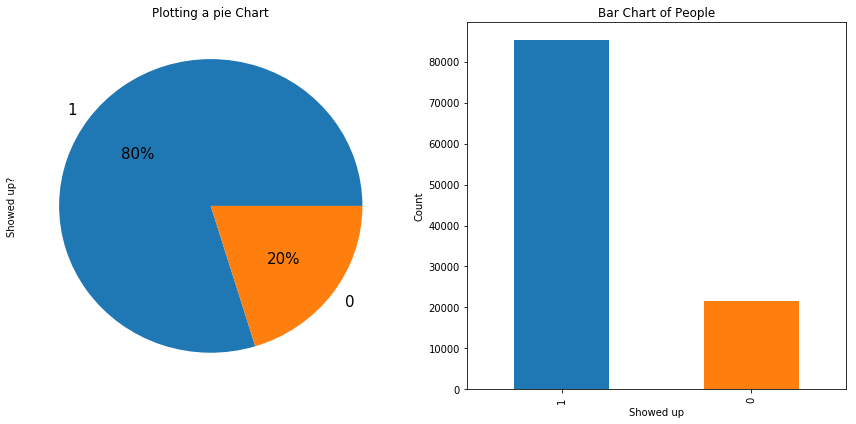

In [40]:
# plotting the precentage of people showing up and their count
plt.subplot(1, 2, 1)
df['showed_up'].value_counts().plot(kind='pie', figsize=(12,6), 
                                    fontsize=15, autopct='%1.0f%%')
plt.title('Plotting a pie Chart')
plt.ylabel('Showed up?')


plt.subplot(1, 2, 2)
df['showed_up'].value_counts().plot(kind='bar', figsize=(12,6))
plt.title('Bar Chart of People')
plt.xlabel('Showed up')
plt.ylabel('Count')

#plt.show()
plt.tight_layout()

##### we have 80% of people showing up with  the count 80,000

In [19]:
#splitting the dataset into two
#one dataset for people who showed up and the other for people who didn't show up

ye_df = df[df['showed_up'] == 1]
no_df = df[df['showed_up'] == 0]
peoples = df['showed_up'].value_counts().sum()

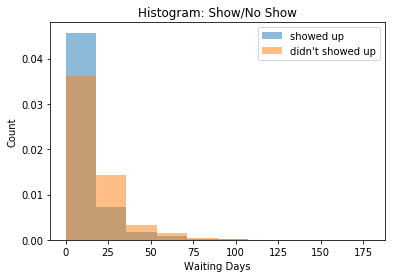

In [46]:
#ditribution od people over the waiting days
plt.hist(ye_df['waiting_days'],alpha=0.5,density=True,
                               label='showed up');
plt.hist(no_df['waiting_days'],alpha=0.5,density=True,
                               label="didn't showed up");

plt.legend();
plt.xlabel('Waiting Days');
plt.ylabel('Count');
plt.title('Histogram: Show/No Show');

##### Both datas for people who showed up and didn't seemed to be right skewed

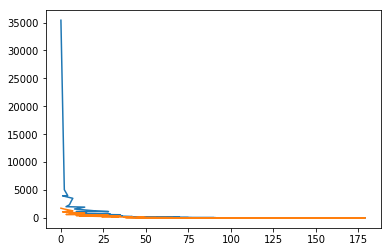

In [21]:
#relation between waiting days and people showing up

ye_df['waiting_days'].value_counts().plot(kind = 'line')
no_df['waiting_days'].value_counts().plot(kind = 'line')

##### people tends to the appointments if its in the same day, and probably won't show up if the appointment is later 25 days, so it seems to ha ve a near appointment with few waiting days

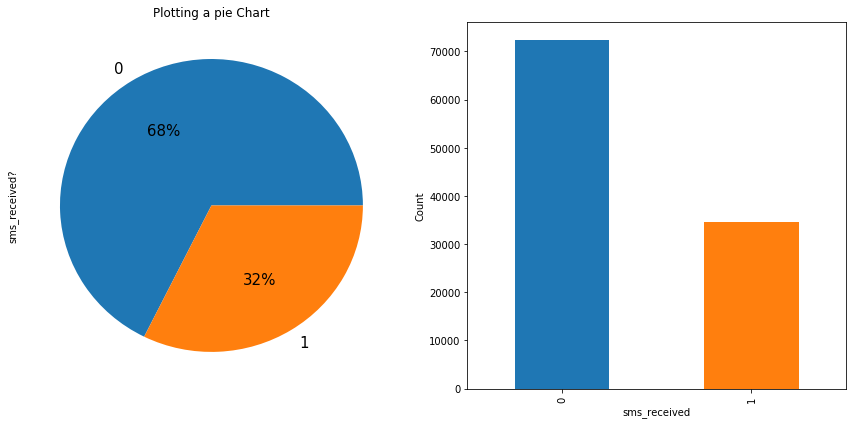

In [22]:
#whole dataset distibution when it comes to wether they got SMS or not

plt.subplot(1, 2, 1)
df['sms_received'].value_counts().plot(kind='pie', figsize=(12,6), 
                                    fontsize=15, autopct='%1.0f%%')
plt.title('Plotting a pie Chart')
plt.ylabel('sms_received?')


plt.subplot(1, 2, 2)
df['sms_received'].value_counts().plot(kind='bar', figsize=(12,6))
plt.xlabel('sms_received')
plt.ylabel('Count')

#plt.show()
plt.tight_layout()


In [23]:
print("People Who recieved Masseges:{}\nPeople Who didn't recieved Masseges:{}\n".format(df.groupby('showed_up').count()['sms_received'][1],
                                                                                        df.groupby('showed_up').count()['sms_received'][0]))

People Who recieved Masseges:85307
People Who didn't recieved Masseges:21675



In [24]:
print("People Who Attended:\nPeople Who recieved Masseges:{}\nPeople Who didn't recieved Masseges:{}\n".format(ye_df.groupby('sms_received').count()['age'][1],
                                                                                                               ye_df.groupby('sms_received').count()['age'][0]))


People Who Attended:
People Who recieved Masseges:25017
People Who didn't recieved Masseges:60290



In [25]:
print("People Who didn't Attended:\nPeople Who recieved Masseges:{}\nPeople Who didn't recieved Masseges:{}\n".format(no_df.groupby('sms_received').count()['age'][1],
                                                                                                               no_df.groupby('sms_received').count()['age'][0]))


People Who didn't Attended:
People Who recieved Masseges:9568
People Who didn't recieved Masseges:12107



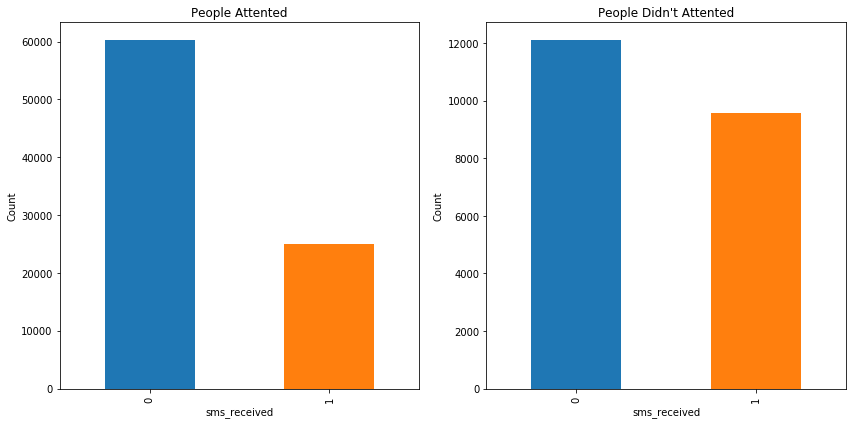

In [26]:
#Looking at the proption between who got messages and who did'nt
#    for both people who arrived and who didn't arrive to the appointment 

plt.subplot(1, 2, 1)

ye_df.groupby('sms_received').count()['age'].plot(kind='bar', figsize=(12,6))
plt.title('People Attented')
plt.xlabel('sms_received')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
no_df.groupby('sms_received').count()['age'].plot(kind='bar', figsize=(12,6))
plt.title("People Didn't Attented")
plt.xlabel('sms_received')
plt.ylabel('Count')

#plt.show()
plt.tight_layout()


In [34]:
#defining a function that would plot a simple cross tabulation of two factors

def my_crosstab(var1,var2,kin):
    pd.crosstab(df[var1],df[var2]).plot(kind=kin, figsize=(12,6));
    plt.xlabel(str(var1))
    plt.ylabel('Count')
    

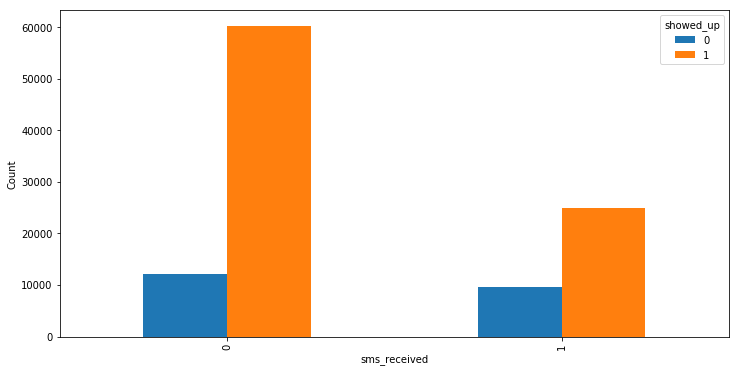

In [35]:
# grouping the two plots above into one
my_crosstab('sms_received','showed_up','bar')

##### It might seems that sending sms's doesn't have that much impact as people will still attend the appointment even if they didn't recieve their message, but the proportin of people who recieved messages seems better than when they are not

### Research Question 2: Check Days and Months that has high appointments

In [30]:
#seeing how much patients each month
df['appointment_month'].value_counts()

5    78197
6    25681
4     3104
Name: appointment_month, dtype: int64

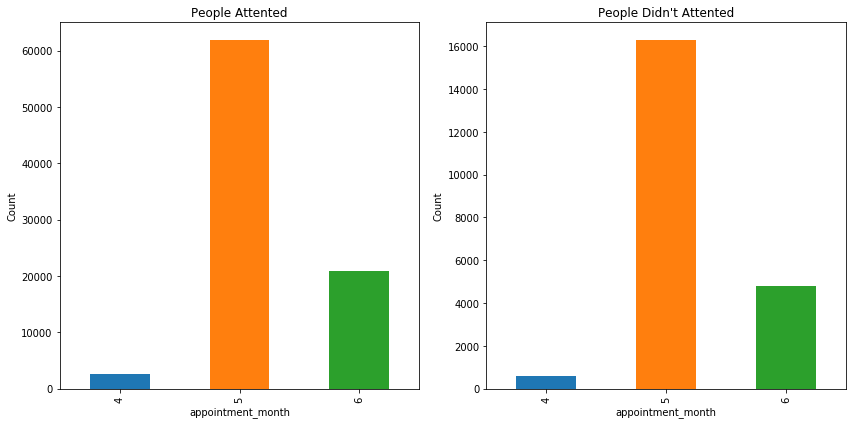

In [31]:
#Looking at the proption for each month for people who showed up and people who didn't
plt.subplot(1, 2, 1)

ye_df.groupby('appointment_month').count()['age'].plot(kind='bar', figsize=(12,6))
plt.title('People Attented')
plt.xlabel('appointment_month')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
no_df.groupby('appointment_month').count()['age'].plot(kind='bar', figsize=(12,6))
plt.title("People Didn't Attented")
plt.xlabel('appointment_month')
plt.ylabel('Count')

#plt.show()
plt.tight_layout()


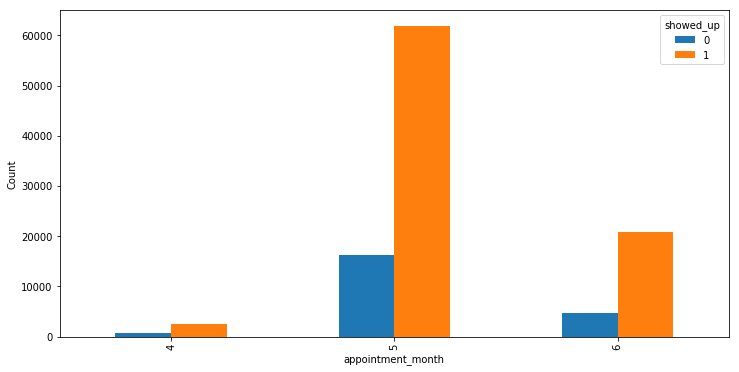

In [38]:
# grouping the two plots above into one
my_crosstab('appointment_month','showed_up','bar')

##### we cant determine wether the month of the appointment does have an impact or not as it seems the data was collected at late April, and stopped early May

In [33]:
#seeing how much patients for each day
df['appointment_day'].value_counts()

Wednesday    25089
Tuesday      24829
Monday       21902
Friday       18465
Thursday     16658
Saturday        39
Name: appointment_day, dtype: int64

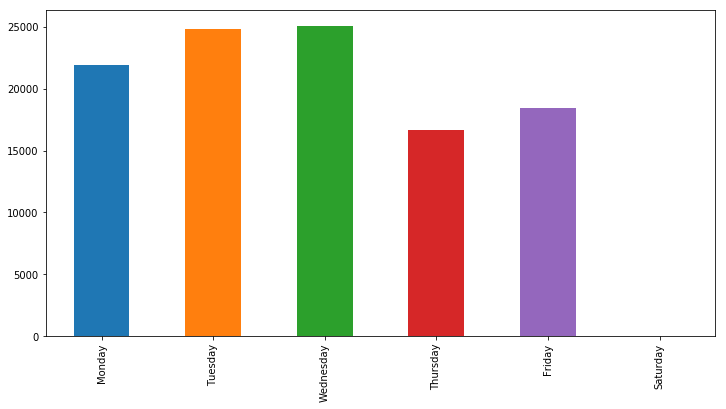

In [61]:
#seeing the distribution of patients for each day
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
df['appointment_day'].value_counts().reindex(days).plot(kind='bar',figsize=(12,6))

Text(0,0.5,'Count')

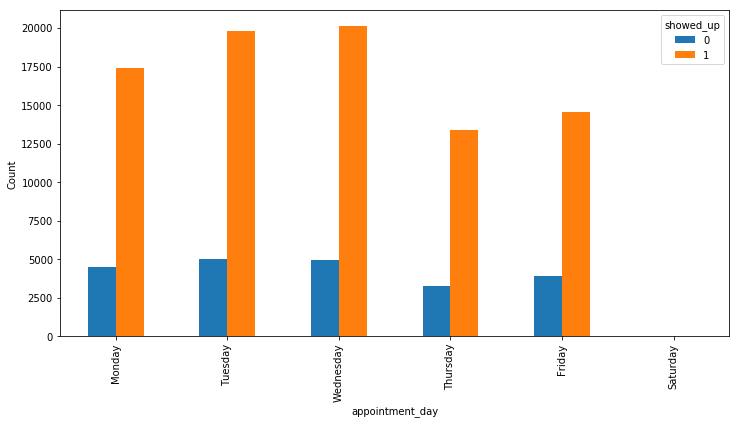

In [62]:
#ploting people behavior over the week
#my_crosstab('appointment_day','showed_up','bar')
pd.crosstab(df['appointment_day'],df['showed_up']).reindex(days).plot(kind='bar', figsize=(12,6));
plt.xlabel(str('appointment_day'))
plt.ylabel('Count')

##### Wedensday and Tuesday seems to be most two crowded days, and saturday is the day off , as days gets crowded more people tend to not show up, so it might be because the crowded hospital or waiting for a long time

### Research Question 3: Living Near The Hospital is a Factor?

In [47]:
# seeing the most 5 neighbours that attended the hospital
df['neighbourhood'].value_counts().head()

JARDIM CAMBURI     7586
MARIA ORTIZ        5563
RESISTÊNCIA        4234
JARDIM DA PENHA    3851
ITARARÉ            3412
Name: neighbourhood, dtype: int64

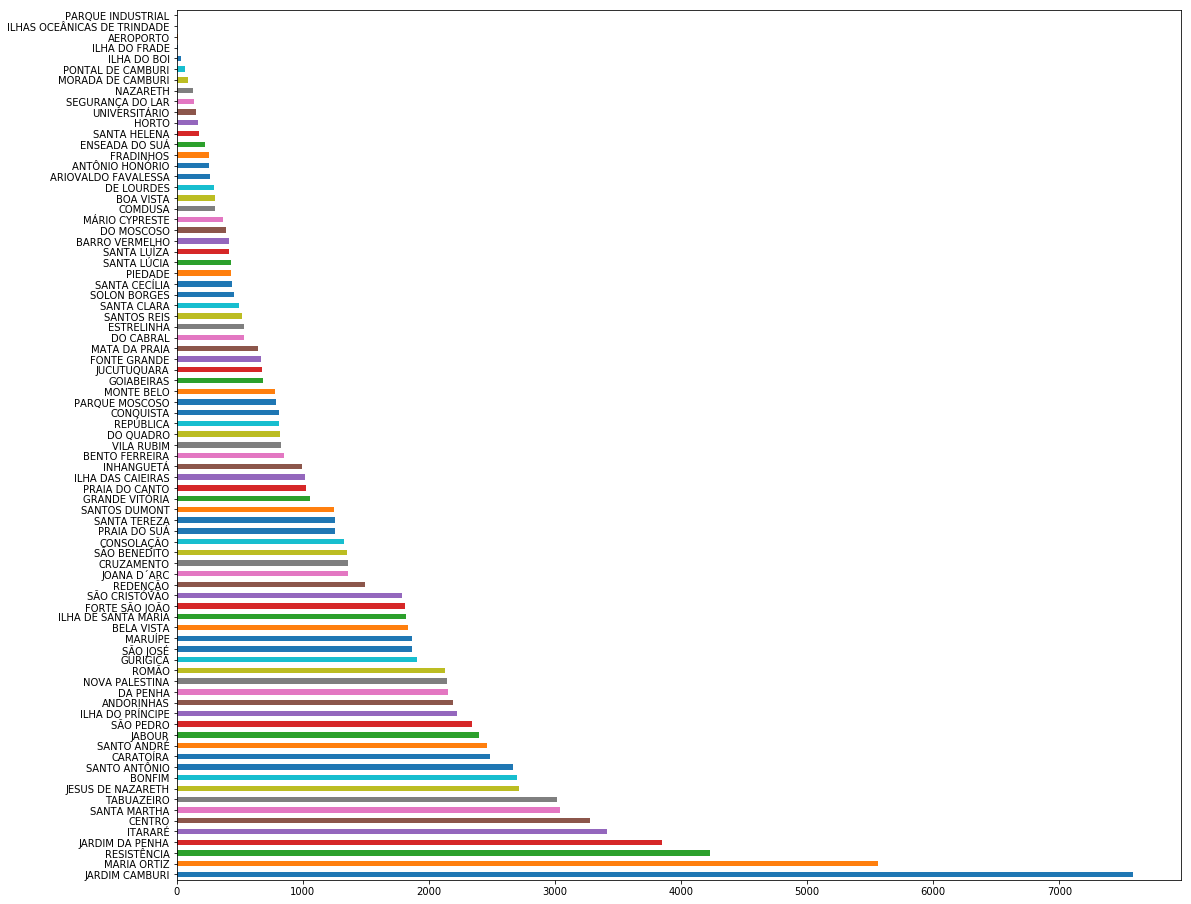

In [55]:
#ploting a horisontal bar chart 
df['neighbourhood'].value_counts().plot(kind='barh',figsize=(18,16))

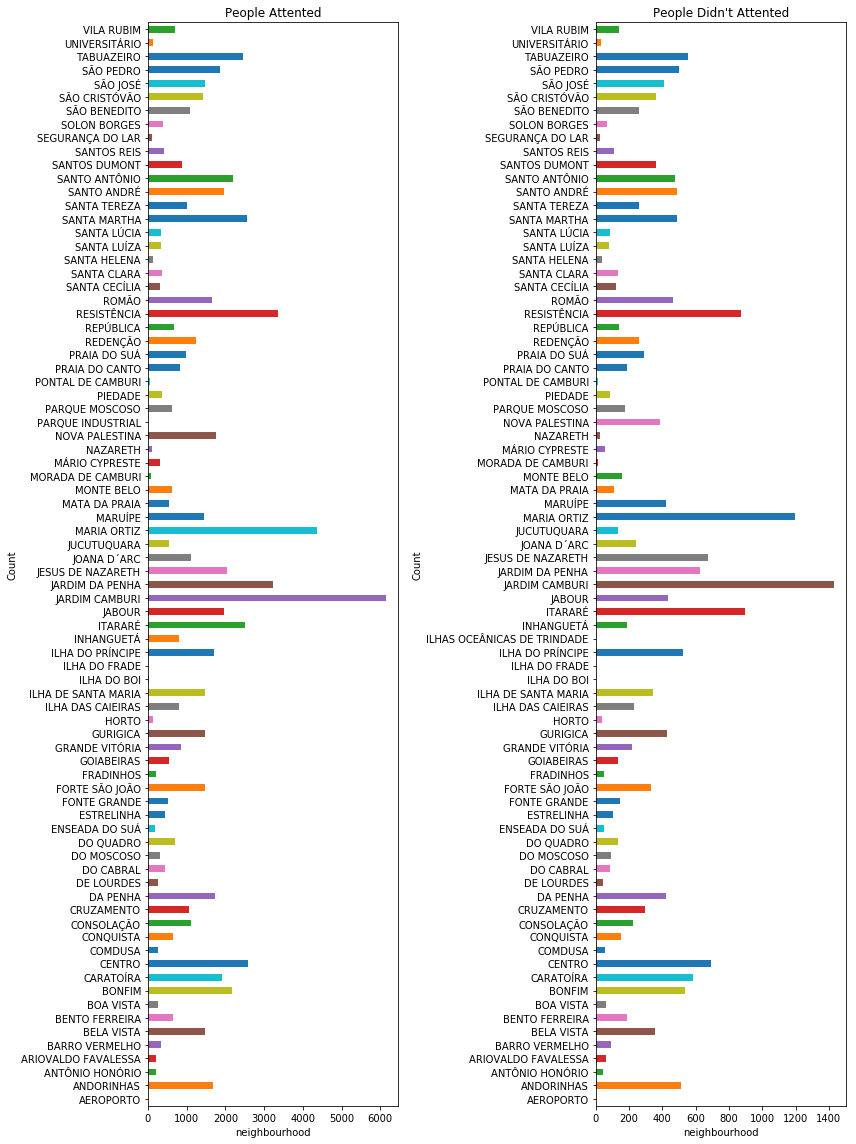

In [53]:
#Looking at the proption between neighbours
#    for both people who arrived and who didn't arrive to the appointment 

plt.subplot(1, 2, 1)

ye_df.groupby('neighbourhood').count()['age'].plot(kind='barh', figsize=(12,16))
plt.title('People Attented')
plt.xlabel('neighbourhood')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
no_df.groupby('neighbourhood').count()['age'].plot(kind='barh', figsize=(12,16))
plt.title("People Didn't Attented")
plt.xlabel('neighbourhood')
plt.ylabel('Count')

#plt.show()
plt.tight_layout()


Text(0,0.5,'Count')

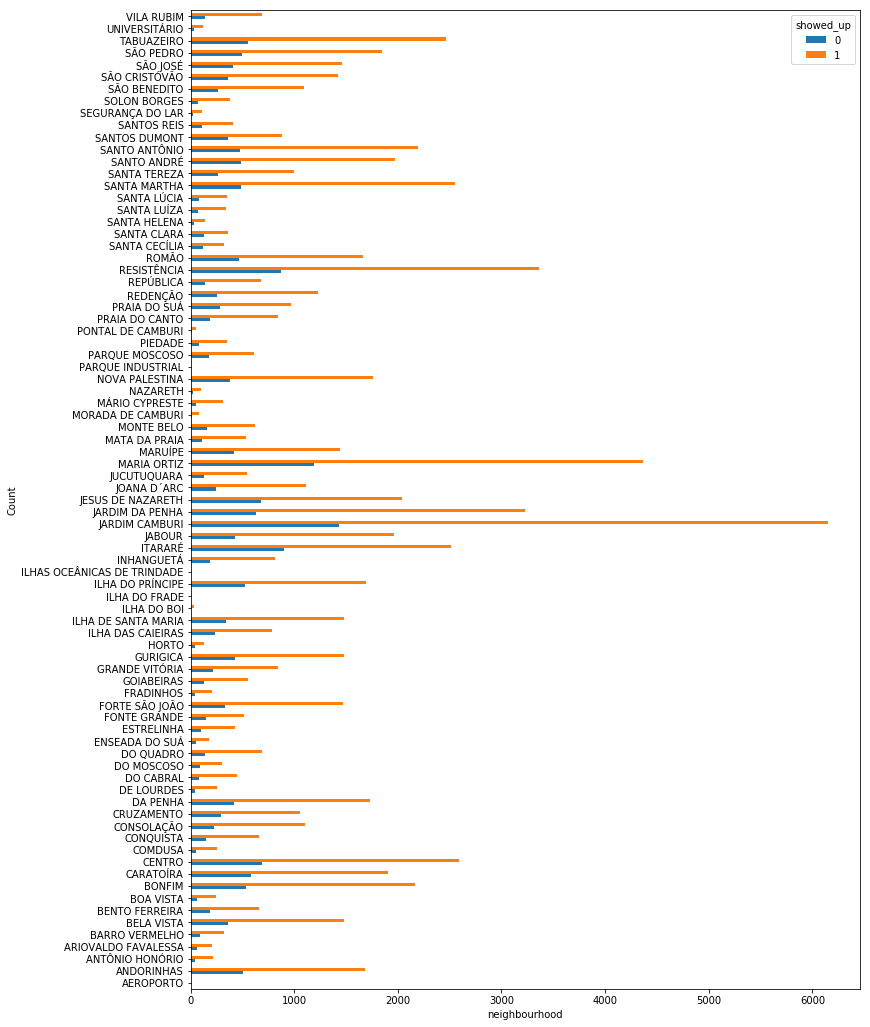

In [56]:
# grouping the two plots above into one
pd.crosstab(df['neighbourhood'],df['showed_up']).plot(kind='barh', figsize=(12,18));
plt.xlabel(str('neighbourhood'))
plt.ylabel('Count')

##### Living near the hospital is obviouslt a factor, as there is alot of people from JARDIM CAMBURI , MARIA ORTIZ and RESISTÊNCIA 


### Research Question 4: Statistics About Patients?

In [56]:
print('The Data has {} Females and {} Males'.format(df['gender'].value_counts()[0],
                                                    df['gender'].value_counts()[1]))

The Data has 70115 Females and 36867 Males


In [60]:
print('The Average Age is {0:.2f}'.format(df['age'].mean()))

The Average Age is 38.32


In [69]:
print('The Median Waiting days is {0:.0f} Days'.format(df['waiting_days'].median()))

The Median Waiting days is 4 Days


In [74]:
print('The Data has {} Diabitic and {} Non-Diabitic'.format(df['diabetes'].value_counts()[1],
                                                            df['diabetes'].value_counts()[0]))


The Data has 7943 Diabitic and 99039 Non-Diabitic


<a id='conclusions'></a>
## Conclusions

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

This code uses pandas and matplotlib with good documentation at each step.

After finding out that 20% of people didn't show up,
We stated these questions:

    1. longer waiting days and having no sms recieved is a big factor fot not showing up?
    
        It seemed that having a longer waiting time was a factor as people didn't show up if the waiting days was more than
        25 days.
        Recieving SMS didn't have much impact, as most of the people who got messages didn't show up
        
    2. Check Days and Months that has high appointments.
        we couldn't say much about the months, as the data was collected for about one month and half, so there was nothing 
        much to tell
        The hospitals seemed crowded during Tuesday and Wedensday, and both these two days also had the most people of not 
        showing up, so having a crowded hospital is an impact for not showing up as people dont like that
    
    3. Living Near The Hospital is a Factor?
        it seemed that there is a dominator when it comes to the neighbours, so it might be its a crowded neighbourhood,
        or its because the place is neer the hospital
        
    4. Statistics About Patients?
        we saw that most of the patients are females, average age of patient is 38, median of waiting days is 4 days,
        and most of the patients are not diabitic
    
The Limitation of this data analysis is:

    1- we are working with a sample data which implies uncertainty, for example what about different time of the year
    2- we were working with some missing value that could've made a great impact, such as the hour of the appointment, does people miss the early hours or late night?



